# Soft K-means Viz

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [33]:
#Dimensions/Features
D = 2

#Separations
s = 4

#Number of samples
N = 900

#Matrix NxD
X = np.zeros((N, D))

#Gaussian means
mu1 = np.array([0, 0])
mu2 = np.array([s, s])
mu3 = np.array([0, s])

#Gaussian clouds
X[:300, :] = np.random.randn(300, D) + mu1
X[300:600, :] = np.random.randn(300, D) + mu2
X[600:, :] = np.random.randn(300, D) + mu3

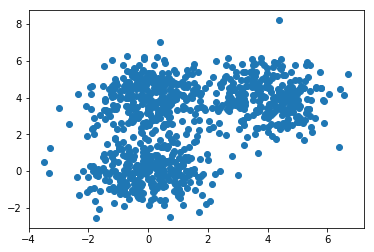

In [34]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [35]:
def d(u, v):
    diff = u - v
    return diff.dot(diff)

In [36]:
def cost(X, R, M):
    cost = 0
    for k in range(len(M)):
        for n in range(len(X)):
            cost += R[n, k]*d(M[k], X[n])
    return cost

In [37]:
def plot_k_means(X, K, max_iter=20, beta=1):
    # Get X shape
    N, D = X.shape
    
    # Means initialize to zero KxD dimensionallity
    M = np.zeros((K, D))
    
    # Responsability matrix
    R = np.zeros((N, K))
    
    # Initialize M to random
    for k in range(K):
        M[k] = X[np.random.choice(N)]
        
    random_colors = np.random.random((K, 3))
        
    # Know the progress in each iteration
    costs = np.zeros(max_iter)
    
    for i in range(max_iter):
        # Moved the plot inside the for loop
        colors = R.dot(random_colors)
        plt.scatter(X[:,0], X[:,1], c=colors)
        plt.title('Iteration: ' + str(i))
        plt.show()
        
        # Step 1: determine resposibilities
        for k in range(K):
            for n in range(N):
                R[n, k] = np.exp(-beta*d(M[k], X[n])) / np.sum(np.exp(-beta*d(M[j], X[n])) for j in range(K))
                
        # Step 2: recalculate means
        for k in range(K):
            M[k] = R[:,k].dot(X) / R[:,k].sum()
            
        costs[i] = cost(X, R, M)
        if i > 0:
            if np.abs(costs[i] - costs[i-1]) < 0.1:
                #Plot costs
                plt.plot(costs)
                plt.title('costs')
                plt.show()
                break

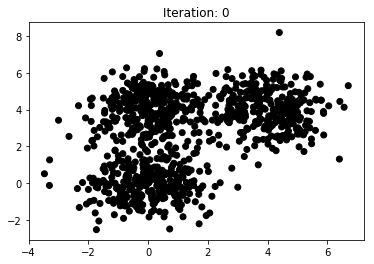

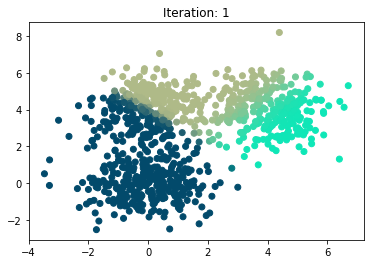

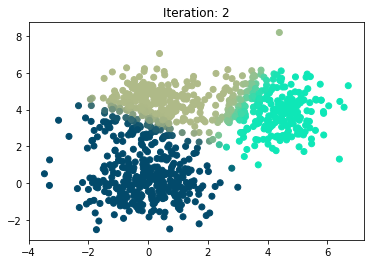

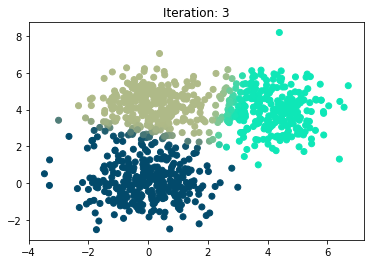

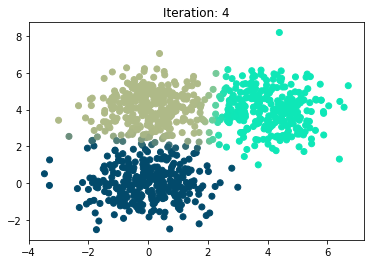

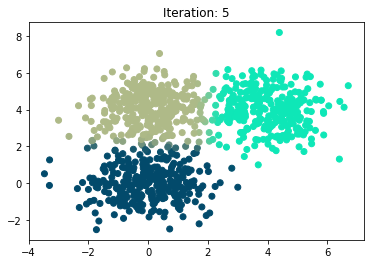

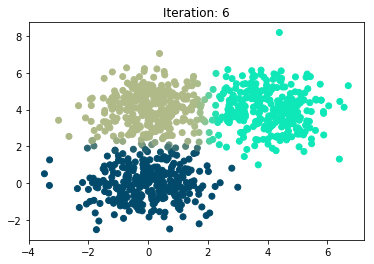

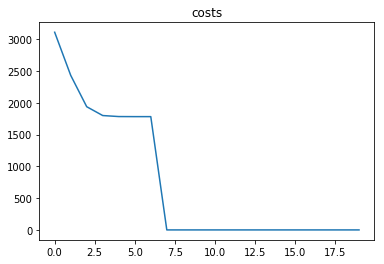

In [38]:
K = 3 # luckily, we already know this
plot_k_means(X, K)